# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
dataset1=pd.read_csv("Cleaned_Data.csv")
dataset1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [3]:
dataset1.describe

<bound method NDFrame.describe of         Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Conges

In [4]:
dataset1.shape

(316800, 26)

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

In [6]:
dataset1.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [7]:
print("age between 0 t0 9 distribution\n",dataset1.iloc[:,11].value_counts())

age between 0 t0 9 distribution
 0    253440
1     63360
Name: Age_0-9, dtype: int64


In [8]:
print("age between 10 t0 19 distribution\n",dataset1.iloc[:,12].value_counts())

age between 10 t0 19 distribution
 0    253440
1     63360
Name: Age_10-19, dtype: int64


In [9]:
print("age between 20 t0 24 distribution\n",dataset1.iloc[:,13].value_counts())

age between 20 t0 24 distribution
 0    253440
1     63360
Name: Age_20-24, dtype: int64


In [10]:
print("age between 25 t0 59 distribution\n",dataset1.iloc[:,14].value_counts())

age between 25 t0 59 distribution
 0    253440
1     63360
Name: Age_25-59, dtype: int64


In [11]:
print("age 60+ distribution\n",dataset1.iloc[:,15].value_counts())

age 60+ distribution
 0    253440
1     63360
Name: Age_60+, dtype: int64


In [12]:
print("gender Distribution for male\n",dataset1["Gender_Male"].value_counts())

gender Distribution for male
 0    211200
1    105600
Name: Gender_Male, dtype: int64


In [13]:
print("gender Distribution for male\n",dataset1["Gender_Female"].value_counts())

gender Distribution for male
 0    211200
1    105600
Name: Gender_Female, dtype: int64


In [14]:
print("gender Distribution for male\n",dataset1["Gender_Transgender"].value_counts())

gender Distribution for male
 0    211200
1    105600
Name: Gender_Transgender, dtype: int64


# For Mild Severity

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_Mild', ylabel='count'>

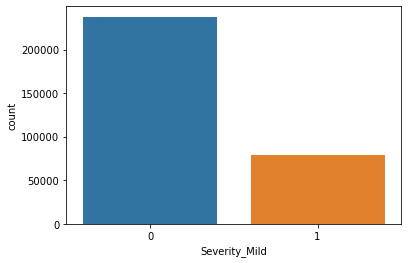

In [61]:
sns.countplot(dataset1.iloc[:,19])

In [15]:
smote=SMOTE()
balanced_msx,balanced_msy=smote.fit_resample(dataset1.iloc[:,0:19],dataset1.iloc[:,19])
print(balanced_msx.shape)
print(balanced_msy.shape)

(475200, 19)
(475200,)


In [16]:
scaler=StandardScaler()
scale_x=scaler.fit_transform(balanced_msx)
scale_x

array([[ 1.48233217,  0.99981483,  0.88214337, ..., -0.70756551,
         1.41327663, -0.70617958],
       [ 1.48233217,  0.99981483,  0.88214337, ..., -0.70756551,
         1.41327663, -0.70617958],
       [ 1.48233217,  0.99981483,  0.88214337, ..., -0.70756551,
         1.41327663, -0.70617958],
       ...,
       [-0.67461263,  0.99981483, -1.13360258, ...,  1.41329669,
        -0.70757556, -0.70617958],
       [-0.67461263, -1.0001852 , -1.13360258, ...,  1.41329669,
        -0.70757556, -0.70617958],
       [-0.67461263,  0.99981483,  0.88214337, ..., -0.70756551,
         1.41327663, -0.70617958]])

In [17]:
print("Values count in Balanced dependent dataset for mild severity",balanced_msy.value_counts())

Values count in Balanced dependent dataset for mild severity 0    237600
1    237600
Name: Severity_Mild, dtype: int64


In [18]:
pca=PCA(0.95)
x_red=pca.fit_transform(scale_x)
x_red.shape

(475200, 15)

## Splitting the Dataset for Training 

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_red,balanced_msy,test_size=0.30,random_state=123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

## Training Models

In [ ]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_lr=lr.predict(test_x)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_y,pred_lr))
print("The accuracy of Logistic Regression is:\t\t",metrics.accuracy_score(test_y,pred_lr))
print("The recal score of Logistic Regression is is:\t\t",metrics.recall_score(test_y,pred_lr))
print("The precision of Logistic Regression is:\t\t",metrics.precision_score(test_y,pred_lr))
print("The f1 score of Logistic Regression is:\t\t",metrics.f1_score(test_y,pred_lr))

In [ ]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_y,pred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_y,pred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_y,pred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_y,pred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_y,pred))

In [ ]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_y,pred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",metrics.accuracy_score(test_y,pred_ada))
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_y,pred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_y,pred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_y,pred_ada))

In [ ]:
dsc=DecisionTreeClassifier()
dsc.fit(train_x,train_y)
pred_dsc=dsc.predict(test_x)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_y,pred_dsc))
print("The accuracy of Decision Tree Classifier is:\t\t",metrics.accuracy_score(test_y,pred_dsc))
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_y,pred_dsc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_y,pred_dsc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_y,pred_dsc))

# For Moderate Severity

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_Moderate', ylabel='count'>

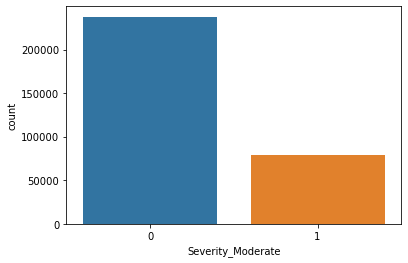

In [62]:
sns.countplot(dataset1.iloc[:,20])

In [24]:
balanced_mosx,balanced_mosy=smote.fit_resample(dataset1.iloc[:,0:19],dataset1.iloc[:,20])
print(balanced_msx.shape)
print(balanced_msy.shape)

(475200, 19)
(475200,)


In [70]:
scaler=StandardScaler()
balanced_mosx=scaler.fit_transform(balanced_mosx)
balanced_mosx

array([[-1.64621866e+00,  4.94430104e-02, -1.55487306e+00, ...,
        -1.36480169e+00,  7.44398469e-04,  9.96785376e-07],
       [-1.64621866e+00,  4.94430105e-02, -1.55487306e+00, ...,
        -1.36480169e+00,  7.44398459e-04,  9.96920451e-07],
       [-1.64621866e+00,  4.94430105e-02, -1.55487306e+00, ...,
        -1.36480169e+00,  7.44398459e-04,  9.96921180e-07],
       ...,
       [ 7.30371030e-01, -8.57461884e-01, -7.74452650e-02, ...,
        -5.11339400e-01,  7.62520517e-01, -1.36144620e+00],
       [ 1.22422609e+00,  7.69128522e-01,  9.75259400e-01, ...,
        -1.24393595e+00, -9.18057846e-01, -1.50390188e+00],
       [-1.05615450e+00,  2.27890868e-02, -6.86722694e-02, ...,
        -4.88157102e-01,  6.38843542e-01,  4.26341077e-02]])

In [83]:
pca=PCA(0.95)
balanced_mosx=pca.fit_transform(balanced_msx)
balanced_mosx.shape

(475200, 14)

## Training Models

In [92]:
train_mox,test_mox,train_moy,test_moy=train_test_split(balanced_mosx,balanced_mosy,test_size=0.30,random_state=42)
print(train_mox.shape)
print(train_moy.shape)
print(test_mox.shape)
print(test_moy.shape)

(332640, 14)
(332640,)
(142560, 14)
(142560,)


### Using AdaBoost Classifier 

In [93]:
ada_mo=AdaBoostClassifier()
ada_mo.fit(train_mox,train_moy)
pred_ada_mo=ada_mo.predict(test_mox)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_moy,pred_ada_mo))
print("The accuracy of AdaBoost Classifier is:\t\t",metrics.accuracy_score(test_moy,pred_ada_mo))
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_moy,pred_ada_mo))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_moy,pred_ada_mo))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_moy,pred_ada_mo))

The confussion metrix for AdaBoost is:
 [[37553 33546]
 [38568 32893]]
The accuracy of AdaBoost Classifier is:		 0.4941498316498317
The recal score of AdaBoost Classifier is is:		 0.4602930269657575
The precision of AdaBoost Classifier is:		 0.4950857177260344
The f1 score of AdaBoost Classifier is:		 0.4770558375634518


### Using Random Forest Classifier

In [ ]:
rf_mo=RandomForestClassifier()
rf_mo.fit(train_mox,train_moy)
pred_rf_mo=rf_mo.predict(test_mox)
print("The confussion metrix for Decision Tree Classifier is:\n",metrics.confusion_matrix(test_moy,pred_rf_mo))
print("The accuracy of Decision Tree Classifier is:\t\t",metrics.accuracy_score(test_moy,pred_rf_mo))
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_moy,pred_rf_mo))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_moy,pred_rf_mo))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_moy,pred_rf_mo))

### Using Decision Tree Classifier

In [ ]:
dsc_mo=DecisionTreeClassifier()
dsc_mo.fit(train_mox,train_moy)
pred_dsc_mo=dsc_mo.predict(test_mox)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_moy,pred_dsc_mo))
print("The accuracy of Decision Tree Classifier is:\t\t",metrics.accuracy_score(test_moy,pred_dsc_mo))
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_moy,pred_dsc_mo))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_moy,pred_dsc_mo))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_moy,pred_dsc_mo))

### Using Logistic Regression 

In [ ]:
lr_mo=LogisticRegression()
lr_mo.fit(train_mox,train_moy)
pred_lr_mo=lr_mo.predict(test_mox)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_moy,pred_lr_mo))
print("The accuracy of Logistic Regression is:\t\t",metrics.accuracy_score(test_moy,pred_lr_mo))
print("The recal score of Logistic Regression is is:\t\t",metrics.recall_score(test_moy,pred_lr_mo))
print("The precision of Logistic Regression is:\t\t",metrics.precision_score(test_moy,pred_lr_mo))
print("The f1 score of Logistic Regression is:\t\t",metrics.f1_score(test_moy,pred_lr_mo))

# For Severe Severity

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_Severe', ylabel='count'>

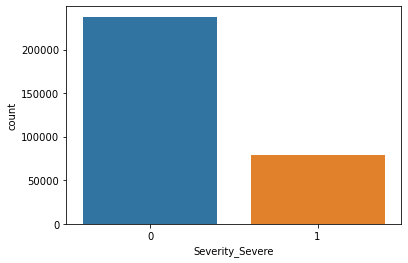

In [63]:
sns.countplot(dataset1.iloc[:,22])

In [30]:
balanced_sesx,balanced_sesy=smote.fit_resample(dataset1.iloc[:,0:19],dataset1.iloc[:,22])
print(balanced_sesx.shape)
print(balanced_sesy.shape)

(475200, 19)
(475200,)


In [ ]:
pca

## Splitting the Dateset for Training 

In [31]:
train_sx,test_sx,train_sy,test_sy=train_test_split(balanced_sesx,balanced_sesy,test_size=0.30,random_state=123)
print(train_sx.shape)
print(train_sy.shape)
print(test_sx.shape)
print(test_sy.shape)

(332640, 19)
(332640,)
(142560, 19)
(142560,)


# Training Models

### Using AdaBoost Classifier

In [32]:
ada_se=AdaBoostClassifier()
ada_se.fit(train_sx,train_sy)
pred_ada_se=ada_se.predict(test_sx)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_sy,pred_ada_se))
print("The accuracy of AdaBoost Classifier is:\t\t",metrics.accuracy_score(test_sy,pred_ada_se))
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_sy,pred_ada_se))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_sy,pred_ada_se))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_sy,pred_ada_se))

The confussion metrix for AdaBoost is:
 [[34452 36948]
 [34252 36908]]
The accuracy of AdaBoost Classifier is:		 0.500561167227834
The recal score of AdaBoost Classifier is is:		 0.5186621697582912
The precision of AdaBoost Classifier is:		 0.4997292027729636
The f1 score of AdaBoost Classifier is:		 0.5090196943785513


### Using Random Forest Classifier


In [33]:
rf_se=RandomForestClassifier()
rf_se.fit(train_sx,train_sy)
pred_rf_se=rf_mo.predict(test_sx)
print("The confussion metrix for Random Forest Classifier is:\n",metrics.confusion_matrix(test_sy,pred_rf_se))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_sy,pred_rf_se))
print("The recal score of Random Forest Classifier is is:\t\t",metrics.recall_score(test_sy,pred_rf_se))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_sy,pred_rf_se))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_sy,pred_rf_se))

The confussion metrix for Random Forest Classifier is:
 [[34587 36813]
 [34421 36739]]
The accuracy of Random Forest Classifier is:		 0.5003226711560045
The recal score of Random Forest Classifier is is:		 0.5162872400224845
The precision of Random Forest Classifier is:		 0.4994969545355667
The f1 score of Random Forest Classifier is:		 0.5077533307534966


### Using Logistic Regression 

In [34]:
lr_se=LogisticRegression()
lr_se.fit(train_sx,train_sy)
pred_lr_se=lr_se.predict(test_sx)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_sy,pred_lr_se))
print("The accuracy of Logistic Regression is:\t\t",metrics.accuracy_score(test_sy,pred_lr_se))
print("The recal score of Logistic Regression is is:\t\t",metrics.recall_score(test_sy,pred_lr_se))
print("The precision of Logistic Regression is:\t\t",metrics.precision_score(test_sy,pred_lr_se))
print("The f1 score of Logistic Regression is:\t\t",metrics.f1_score(test_sy,pred_lr_se))

The confussion metrix for Logistic Regression is:
 [[34447 36953]
 [34215 36945]]
The accuracy of Logistic Regression is:		 0.5007856341189675
The recal score of Logistic Regression is is:		 0.5191821247892074
The precision of Logistic Regression is:		 0.4999458713361661
The f1 score of Logistic Regression is:		 0.5093824539149857


### Using Decision Tree Classifier

In [35]:
dsc_se=DecisionTreeClassifier()
dsc_se.fit(train_sx,train_sy)
pred_dsc_se=dsc_se.predict(test_sx)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_sy,pred_dsc_se))
print("The accuracy of Decision Tree Classifier is:\t\t",metrics.accuracy_score(test_sy,pred_dsc_se))
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_sy,pred_dsc_se))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_sy,pred_dsc_se))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_sy,pred_dsc_se))

The confussion metrix for Decision Tree is:
 [[37107 34293]
 [36792 34368]]
The accuracy of Decision Tree Classifier is:		 0.5013678451178452
The recal score of Decision Tree Classifier is is:		 0.4829679595278246
The precision of Decision Tree Classifier is:		 0.5005461615764408
The f1 score of Decision Tree Classifier is:		 0.4915999742527946


# For No Severity(Healthy)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_None', ylabel='count'>

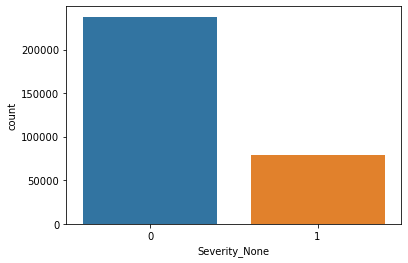

In [64]:
sns.countplot(dataset1.iloc[:,21])

# By Using Merging all Severity type in One method

In [36]:
all_severity = dataset1.filter(like='Severity_').columns

In [37]:
dataset1['Severity_None'].replace({1:'None',0:'No'},inplace =True)
dataset1['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
dataset1['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
dataset1['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [39]:
dataset1['Condition']=dataset1[all_severity].values.tolist()

In [40]:
def select_one(x):
    x = set(x) 
    x.discard("No")
    a = ''.join(x)
    return a

In [41]:
dataset1['Condition'] = dataset1['Condition'].apply(select_one)

In [42]:
print(dataset1['Condition'].value_counts())

Severe      79200
Mild        79200
None        79200
Moderate    79200
Name: Condition, dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition', ylabel='count'>

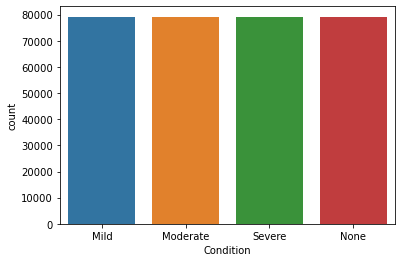

In [43]:
sns.countplot(dataset1['Condition'])

In [44]:
dataset1['Condition'] = le.fit_transform(dataset1['Condition'])
print(dataset1['Condition'].value_counts())

0    79200
1    79200
2    79200
3    79200
Name: Condition, dtype: int64


In [45]:
dataset1['Sum_of_columns'] = dataset1.iloc[:,:5].sum(axis=1) + dataset1.iloc[:,6:10].sum(axis=1)
print(dataset1['Sum_of_columns'].value_counts())

4    66600
3    64800
5    55800
2    48600
6    36000
7    18000
1    16200
8     7200
0     1800
9     1800
Name: Sum_of_columns, dtype: int64


In [46]:
y=dataset1['Condition']

In [47]:
dataset1.drop("Condition",axis=1,inplace=True)

In [49]:
dataset1.drop(all_severity,axis=1,inplace=True)

In [50]:
dataset1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Sum_of_columns
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,9
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,9
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,9
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,9
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,9


In [51]:
dataset1.shape

(316800, 23)

In [52]:
x=dataset1.iloc[:,0:23]
x.shape

(316800, 23)

In [53]:
train_fx,test_fx,train_fy,test_fy=train_test_split(x,y,test_size=0.30,random_state=123)
print(train_fx.shape)
print(train_fy.shape)
print(test_fx.shape)
print(test_fy.shape)

(221760, 23)
(221760,)
(95040, 23)
(95040,)


In [54]:
ada_f=AdaBoostClassifier()
ada_f.fit(train_fx,train_fy)
pred_ada_f=ada_f.predict(test_fx)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_fy,pred_ada_f))
print("The accuracy of AdaBoost Classifier is:\t\t",metrics.accuracy_score(test_fy,pred_ada_f))
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_fy,pred_ada_f,average='micro'))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_fy,pred_ada_f,average='micro'))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_fy,pred_ada_f,average='micro'))

The confussion metrix for AdaBoost is:
 [[7978 5263 6087 4291]
 [8293 5085 6033 4227]
 [8489 5292 5802 4259]
 [8461 5283 6091 4106]]
The accuracy of AdaBoost Classifier is:		 0.24169823232323231
The recal score of AdaBoost Classifier is is:		 0.24169823232323231
The precision of AdaBoost Classifier is:		 0.24169823232323231
The f1 score of AdaBoost Classifier is:		 0.24169823232323231
